In [14]:
import os 
import random 
import matplotlib.pyplot as plt 
import cv2 
from tqdm.auto import tqdm 
import json 
import numpy as np 

In [5]:
pseudo_label_list = os.listdir('/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/annotations/1findings/v1') 
sample_fnames = random.sample(pseudo_label_list, k=9) 
sample_fnames 

['MIMIC_CXR_p14489052-s54968318-147630.json',
 'NIH_CXR_108303.json',
 'SIIM_CXR_007527.json',
 'MIMIC_CXR_p13352405-s58143212-100288.json',
 'NIH_CXR_085496.json',
 'NIH_CXR_094160.json',
 'MIMIC_CXR_p13558215-s51658205-092659.json',
 'MIMIC_CXR_p12856295-s53523322-100947.json',
 'MIMIC_CXR_p19664474-s57424129-155440.json']

In [18]:
def plot_pseudo_label(gt_fnames, findings, ann_version):
    PALETTE = [(220, 20, 60), (0, 82, 0), (0, 0, 142), (220, 220, 0), (106, 0, 228)]

    n_cols = 3 
    n_rows = len(gt_fnames) // n_cols 
    
    ann_dir = f'/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/annotations/{findings}findings/v{ann_version}' 
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*6)) 
   
    for i, gt_fname in enumerate(tqdm(gt_fnames)):
        with open(os.path.join(ann_dir, gt_fname), 'r') as f: 
            label_dict = json.load(f)

        anns = label_dict['annotations']  

        draw_image = cv2.imread(label_dict['file_name'])
        for ann in anns: 
            x1, y1, x2, y2 = ann['bbox']
            cat_id = ann['category_id'] 
            draw_image = cv2.rectangle(draw_image, (x1, y1), (x2, y2), PALETTE[cat_id], 2) 

            points = ann['segmentation'][0]
            polygon_x = [x for index, x in enumerate(points) if index % 2 == 0] 
            polygon_y = [y for index, y in enumerate(points) if index % 2 == 1] 
            polygon_xy = [(x, y) for x, y in zip(polygon_x, polygon_y)] 
            draw_image = cv2.polylines(draw_image, [np.array(polygon_xy)], True, PALETTE[cat_id], 2) 

        axes[i//(n_rows)][i%n_cols].imshow(draw_image) 
        axes[i//(n_rows)][i%n_cols].set_title(f'{gt_fname}') 
        # axes[i//(n_rows)][i%n_cols].axis('off') 

    plt.tight_layout() 
    plt.show() 

100%|██████████| 9/9 [00:00<00:00, 59.79it/s]


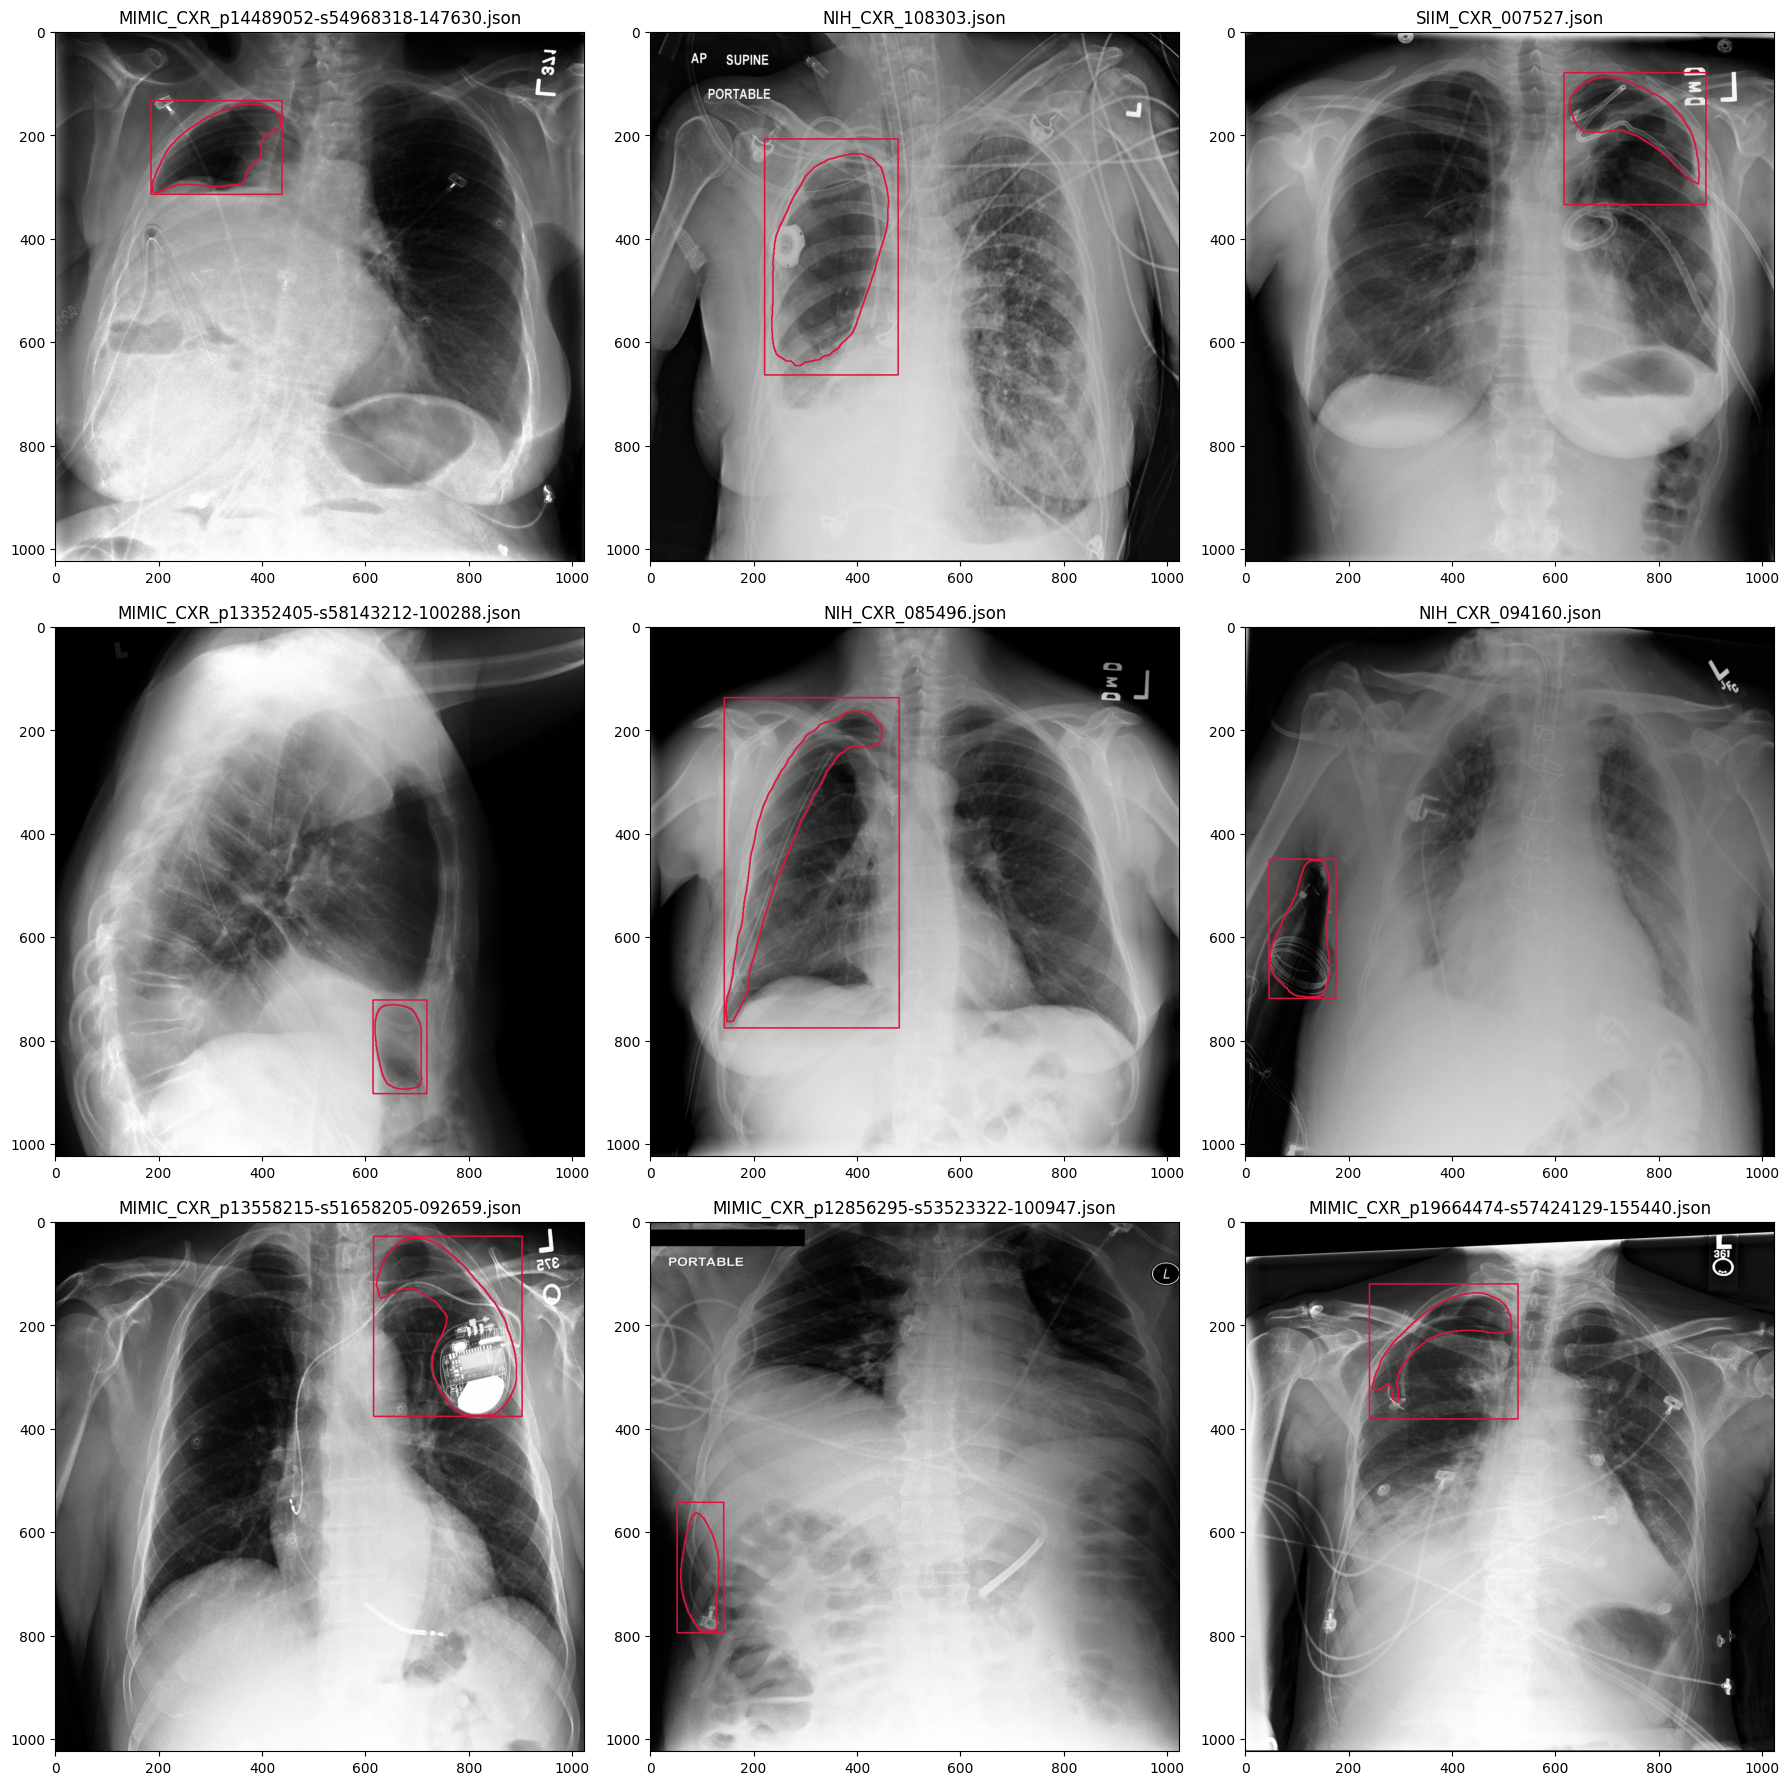

In [19]:
plot_pseudo_label(sample_fnames, findings=1, ann_version=1) 

100%|██████████| 9/9 [00:00<00:00, 52.66it/s]


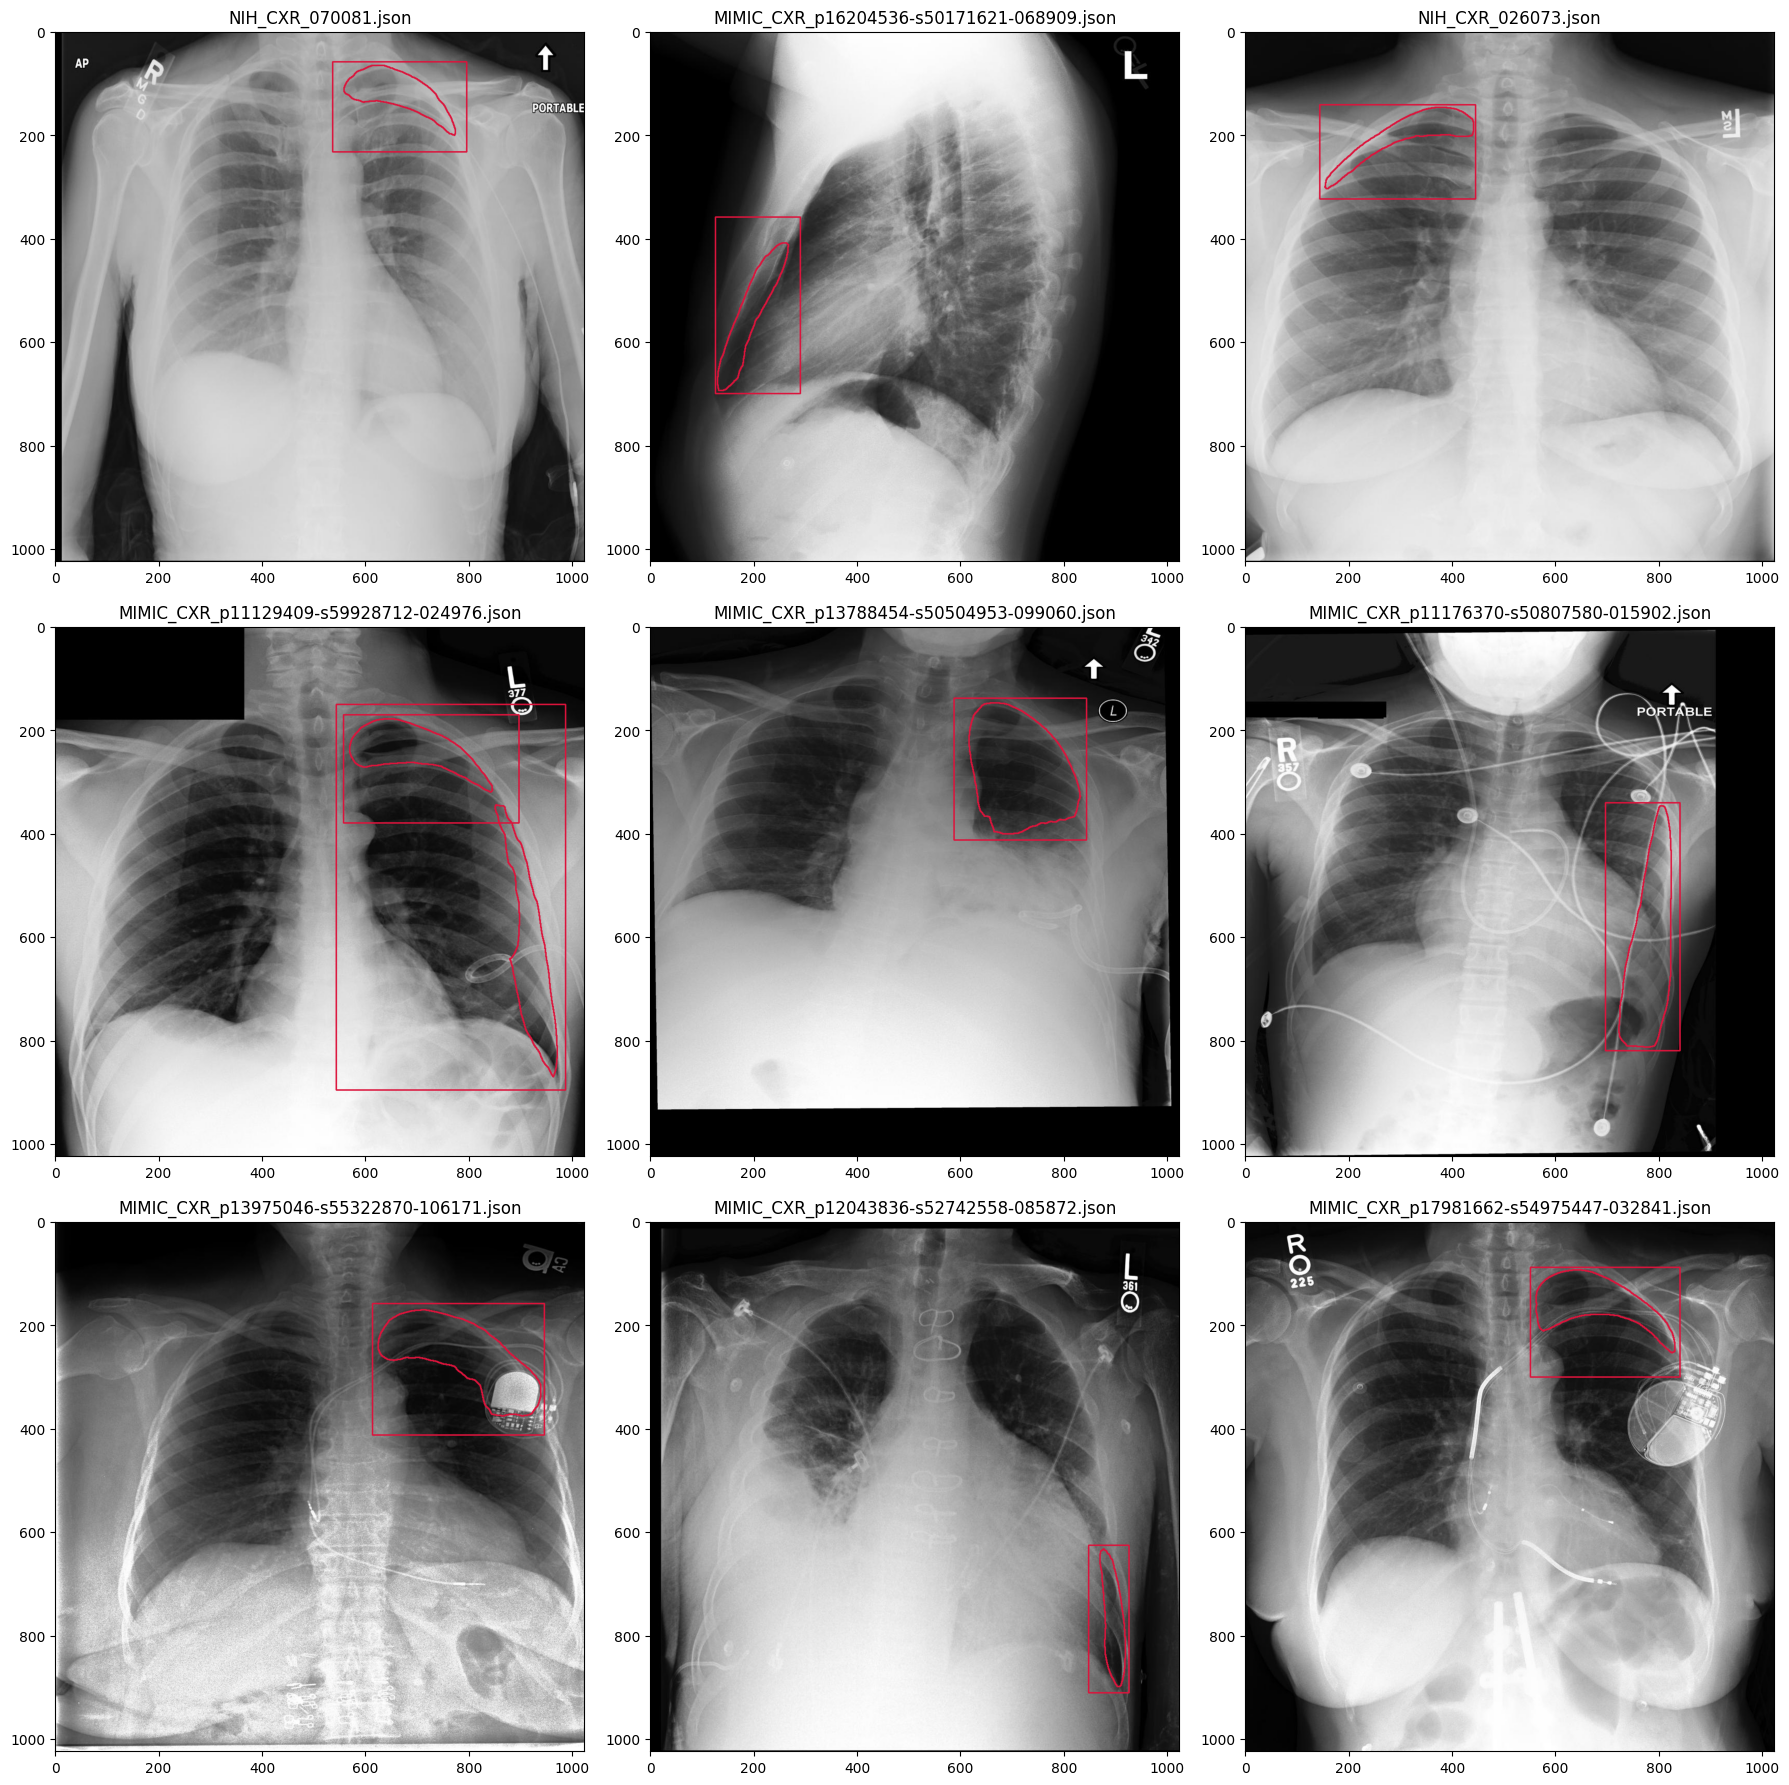

In [20]:
random.seed(42) 

sample_fnames2 = random.sample(pseudo_label_list, k=9) 
plot_pseudo_label(sample_fnames2, findings=1, ann_version=1) 